<a href="https://colab.research.google.com/github/rish1710/ml-assignments/blob/main/ml_08_rishit_mahesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=2.7, random_state=42)
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

print("Lowest SSE:", kmeans.inertia_)
print("Centroids:\n", kmeans.cluster_centers_)
print("Iterations to converge:", kmeans.n_iter_)
print("Predicted labels for first 10 points:", kmeans.labels_[:10])

Lowest SSE: 2582.9458720873313
Centroids:
 [[ 4.69097925  2.14914367]
 [-2.74273082  8.97295268]
 [-6.48129177 -6.71300879]]
Iterations to converge: 6
Predicted labels for first 10 points: [0 1 2 2 2 2 1 2 1 2]


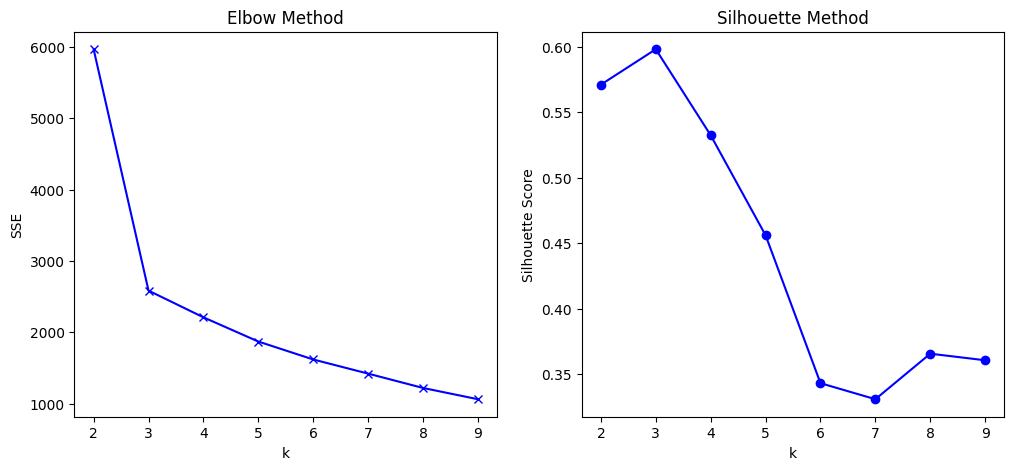

In [ ]:
sse = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


Silhouette Score: 0.4037628978392535


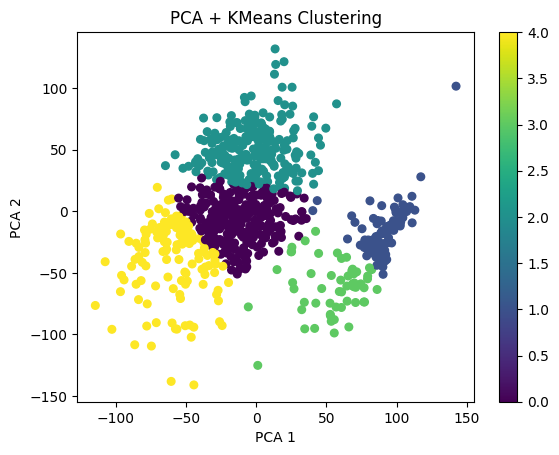

In [ ]:
df_rna = pd.read_csv("/content/data.csv", index_col=0)
X_scaled_rna = StandardScaler().fit_transform(df_rna.values)

pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

pipeline.fit(X_scaled_rna)
pca_data = pipeline.named_steps['pca'].transform(X_scaled_rna)
labels_rna = pipeline.named_steps['kmeans'].labels_
score_rna = silhouette_score(pca_data, labels_rna)

print("Silhouette Score:", score_rna)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_rna, cmap='viridis', s=30)
plt.title("PCA + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

In [ ]:
train = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")
test = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")
df_titanic = pd.concat([train, test], sort=False)

df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Fare'].fillna(df_titanic['Fare'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)
df_titanic.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
df_titanic = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'], drop_first=True)

X_titanic = df_titanic.drop('Survived', axis=1)
X_scaled_titanic = StandardScaler().fit_transform(X_titanic)

kmeans_titanic = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_titanic.fit(X_scaled_titanic)
df_titanic['Cluster'] = kmeans_titanic.labels_

print(df_titanic['Cluster'].value_counts())

Cluster
0    842
2    344
1    123
Name: count, dtype: int64


<ipython-input-4-9ea0d535424a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
<ipython-input-4-9ea0d535424a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=